# (Core) Project 1 Revisited: Importances and Coefficients

## Task
- For this assignment, you will revisit your first project to predict supermarket sales. You will apply what you've learned this week to explain how your models made their predictions.

## Project 1 Revisited - Part 1: Remaking, Saving, and Explaining Your Models
For this part of the project, you will be producing a new version of your final project notebook using the updated tools in sklearn v1.1. 

- Create a new notebook called "Project 1 - Revisited.ipynb" in your project repo.
    - You may either make a copy of your prior notebook that you will modify,
or you can start a new blank notebook and copy over the code from your old notebook (as needed).
- Remake your X_train and X_test as DataFrames with the feature names extracted from the column transformer instead of combining your preprocessor and model into 1 pipeline.

## LinearRegression
- Fit and evaluate your LinearRegresion model using your dataframe X_train and X_test data.
- Extract and visualize the coefficients that your model determined.
    - Select the top 3 most impactful features and interpret their coefficients in plain English.
- Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).

## Tree-Based Model
- Fit and evaluate your tree-based regression model using your dataframe X_train and X_test data.
- Extract and visualize the feature importances that your model determined.
    - Identify the top 5 most important features.
- Save your figure as a .png file inside your repository  (you will need this for the final piece of this assignment - Update Your README).

## Serialize Your Best Models with Joblib
- Once you've finished updating and explaining your models, you must save the following key: value pairs as a dictionary in a joblib file named "best-models.joblib":
    - "preprocessor": your preprocessing  column transformer
    - "X_train": your training features.
    - "X_test": your test features.
    - "y_train": your training target.
    - "y_test": your test target.
    - "LinearRegression": your best linear regression
    - Your tree-based model's class name: your best tree-based model.
        - e.g. "RandomForestRegressor"/"DecisionTreeRegressor"
    - Save your joblib file inside your repository. (You will work with these models again in the next core assignment.)

## Update your README.
- Insert your exported figures from above into your README file. You should have the following:
    - Your LinearRegression coefficients plot.
        - Your interpretation of your coefficients.
    - Your tree-based model's feature importances.
    - Your interpretation of your feature importances. 


## Preprocessing

In [1]:
## Typical Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
## Modeling & preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

In [2]:
## Load dataset from published web view link
import pandas as pd
fpath ="https://docs.google.com/spreadsheets/d/e/2PACX-1vS6Sn9LaMSc_E1EHQpuRK6BTpKp6h27obTP_dTpAVu_xtoqsge30jBGh9vYlO4DYe-utRKMgMqYChU_/pub?output=csv"
df = pd.read_csv(fpath)
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [3]:
## replace inconsistent categories
fat_content_map = {'LF':'Low Fat',
                   'reg':'Regular',
                   'low fat':'Low Fat'}
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(fat_content_map)
## Verify 
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [4]:
## Define X and y
target = 'Item_Outlet_Sales'
X = df.drop(columns=target).copy()
y = df[target].copy()
X

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [5]:
## Drop unwanted/inappropriate columns 
bad_cols = ['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year']
X = X.drop(columns=bad_cols)
## Perform a train-test-split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

## Making a Preprocessing Pipeline

In [6]:
## Create categorical pipeline
cat_selector = make_column_selector(dtype_include='object')
# create pipeline for handling categorical data
impute_most_freq = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder(drop='first',sparse=False)

cat_pipe = make_pipeline(impute_most_freq,encoder)
## Create numeric pipelien
num_selector = make_column_selector(dtype_include='number')
num_selector(X_train)
# create pipeline for handling categorical data
impute_mean = SimpleImputer(strategy='mean')
scaler = StandardScaler()
num_pipe = make_pipeline(impute_mean, scaler)
## Combine into 1 column transformer
preprocessor = make_column_transformer( (cat_pipe,cat_selector),
                                       (num_pipe,num_selector),
                                      verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x149360d90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x1493606d0>)],
                  verbose_feature_names_out=False)

In [7]:
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['Item_Fat_Content_Regular', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Weight', 'Item_Visibility',
       'Item_MRP'], dtype=object)

In [8]:
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                           columns = feature_names, index = X_train.index)
X_train_df.head(3)

,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP
4776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.817249,-0.712775,1.828109
7510,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.556340,-1.291052,0.603369
5828,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.131512,1.813319,0.244541


In [9]:
# Now we create a preprocessed DataFrame for our test set.

X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                           columns = feature_names, index = X_test.index)
X_test_df.head(3)

,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP
7503,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.331009,-0.776646,-0.998816
2957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.179892,0.100317,-1.585194
7031,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.378447,-0.482994,-1.595784


In [10]:
# After transformations, it is always a good idea to verify that our X and y values are still matched correctly.

## confirm the first 3 rows index in y_test matches X_test_df
y_test.head(3)

7503    1743.0644
2957     356.8688
7031     377.5086
Name: Item_Outlet_Sales, dtype: float64

## LinearRegression

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [12]:
def evaluate_regression(model, X_train,y_train, X_test, y_test): 
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    
    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")
        
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

In [13]:
## fitting a linear regression model

lin_reg = LinearRegression()
lin_reg.fit(X_train_df, y_train)
evaluate_regression(lin_reg, X_train_df, y_train, X_test_df,y_test)

Training Data:	R^2= 0.56	RMSE= 1140.32
Test Data:	R^2= 0.57	RMSE= 1094.76


In [14]:
lin_reg.coef_

array([ 6.33191025e+01, -2.95185670e+01,  4.73021147e+01,  2.61656744e+01,
       -1.06233063e+02, -1.77042609e+00,  4.39757663e+01,  1.25709164e+01,
        2.71971431e+01,  3.61109355e+00, -9.56042064e+00, -3.18468116e+01,
        3.18777488e+02, -2.09170689e+01, -4.13334175e+01,  4.65485271e+01,
       -5.23778161e+01, -2.88212189e+01,  1.51281030e+01, -7.54216913e+00,
        1.94047905e+03,  1.65791735e+03,  3.36587557e+03, -7.35798529e+00,
       -2.17725716e+01,  9.84314702e+02])

In [42]:
## Checking the number of coeffs matches the # of feature names
print(len(lin_reg.coef_))
len(feature_names)

26


26

In [44]:
## Saving the coefficients
coeffs = pd.Series(lin_reg.coef_, index= feature_names)
coeffs

Item_Fat_Content_Regular             63.319103
Item_Type_Breads                    -29.518567
Item_Type_Breakfast                  47.302115
Item_Type_Canned                     26.165674
Item_Type_Dairy                    -106.233063
Item_Type_Frozen Foods               -1.770426
Item_Type_Fruits and Vegetables      43.975766
Item_Type_Hard Drinks                12.570916
Item_Type_Health and Hygiene         27.197143
Item_Type_Household                   3.611094
Item_Type_Meat                       -9.560421
Item_Type_Others                    -31.846812
Item_Type_Seafood                   318.777488
Item_Type_Snack Foods               -20.917069
Item_Type_Soft Drinks               -41.333418
Item_Type_Starchy Foods              46.548527
Outlet_Size_Medium                  -52.377816
Outlet_Size_Small                   -28.821219
Outlet_Location_Type_Tier 2          15.128103
Outlet_Location_Type_Tier 3          -7.542169
Outlet_Type_Supermarket Type1      1940.479047
Outlet_Type_S

In [45]:
coeffs.loc['intercept'] = lin_reg.intercept_
coeffs

Item_Fat_Content_Regular             63.319103
Item_Type_Breads                    -29.518567
Item_Type_Breakfast                  47.302115
Item_Type_Canned                     26.165674
Item_Type_Dairy                    -106.233063
Item_Type_Frozen Foods               -1.770426
Item_Type_Fruits and Vegetables      43.975766
Item_Type_Hard Drinks                12.570916
Item_Type_Health and Hygiene         27.197143
Item_Type_Household                   3.611094
Item_Type_Meat                       -9.560421
Item_Type_Others                    -31.846812
Item_Type_Seafood                   318.777488
Item_Type_Snack Foods               -20.917069
Item_Type_Soft Drinks               -41.333418
Item_Type_Starchy Foods              46.548527
Outlet_Size_Medium                  -52.377816
Outlet_Size_Small                   -28.821219
Outlet_Location_Type_Tier 2          15.128103
Outlet_Location_Type_Tier 3          -7.542169
Outlet_Type_Supermarket Type1      1940.479047
Outlet_Type_S

In [46]:
df.select_dtypes('object').nunique()

Item_Identifier         1559
Item_Fat_Content           2
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

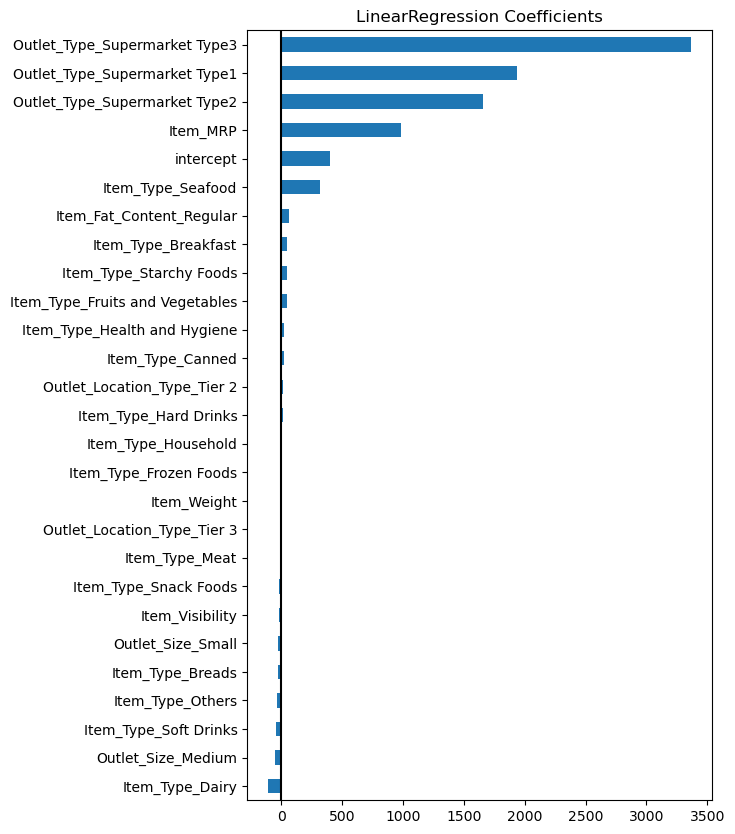

In [47]:
## Plot the coefficients
ax = coeffs.sort_values().plot(kind='barh',figsize=(6,10))
ax.axvline(0,color='k')
ax.set_title('LinearRegression Coefficients');

In [48]:
def plot_coeffs(coeffs, top_n=None,  figsize=(4,5), intercept=False):
    if (intercept==False) & ('intercept' in coeffs.index):
        coeffs = coeffs.drop('intercept')
        
    if top_n==None:
        ## sort all features and set title
        plot_vals = coeffs#.sort_values()
        title = "All Coefficients - Ranked by Magnitude"
    else:
        ## rank the coeffs and select the top_n
        coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
        top_n_features = coeff_rank.head(top_n)
        plot_vals = coeffs.loc[top_n_features.index].sort_values()
        ## sort features and keep top_n and set title
        title = f"Top {top_n} Largest Coefficients"
        
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Coefficient', 
           ylabel='Feature Names', 
           title=title)
    ax.axvline(0, color='k')
    
    ## return ax in case want to continue to update/modify figure
    return ax

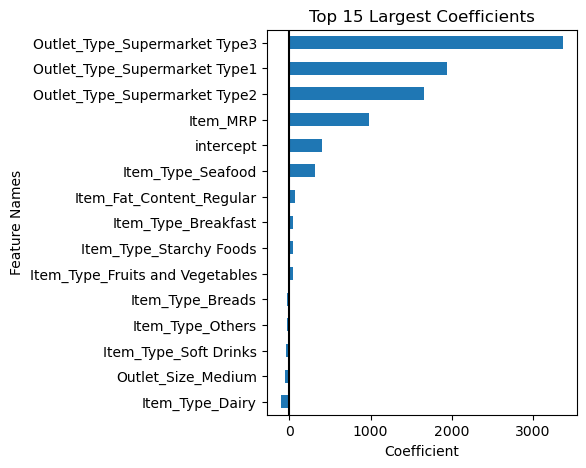

In [49]:
## Testing our function with intercept=True
ax= plot_coeffs(coeffs,top_n=15, intercept=True)

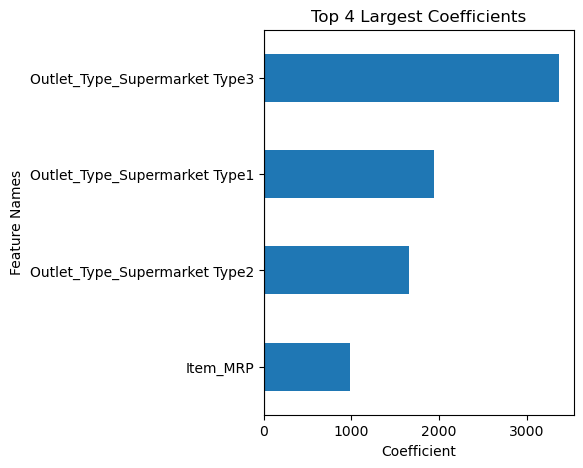

In [51]:
## Testing our function with intercept=True
ax= plot_coeffs(coeffs,top_n=4, intercept=True)

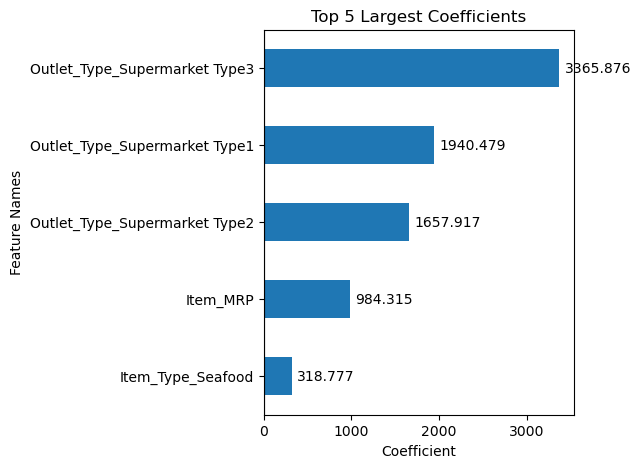

In [53]:
ax= plot_coeffs(coeffs,top_n=5)
for bar in ax.patches:
    ## calculate center of bar
    bar_ax = bar.get_y() + bar.get_height()/2
    ## get the value to annotate
    val = bar.get_width()
    
    if val < 0:
        val_pos = 0
    else:
        val_pos = val
    
    # ha and va stand for the horizontal and vertical alignment
    ax.annotate(f"{val:.3f}", (val_pos,bar_ax),
                ha='left',va='center',size=10,
                xytext=(4,0), textcoords='offset points')

In [15]:
from sklearn.inspection import permutation_importance
## Permutation importance takes a fit model and the test data.
r = permutation_importance(lin_reg, X_test_df, y_test,n_repeats =5)
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [16]:
permutation_importances = pd.Series(r['importances_mean'],index=X_test_df.columns,
                           name = 'permutation importance')
permutation_importances = permutation_importances.sort_values(ascending=False)
permutation_importances

Outlet_Type_Supermarket Type3      0.742848
Item_MRP                           0.640851
Outlet_Type_Supermarket Type1      0.612425
Outlet_Type_Supermarket Type2      0.177491
Outlet_Size_Medium                 0.000259
Item_Fat_Content_Regular           0.000189
Outlet_Location_Type_Tier 3        0.000102
Outlet_Location_Type_Tier 2        0.000095
Item_Visibility                    0.000019
Item_Type_Frozen Foods             0.000008
Item_Type_Hard Drinks             -0.000003
Item_Type_Household               -0.000020
Item_Type_Breads                  -0.000022
Item_Type_Canned                  -0.000025
Item_Type_Soft Drinks             -0.000030
Item_Type_Meat                    -0.000033
Item_Type_Others                  -0.000070
Item_Type_Breakfast               -0.000086
Item_Type_Starchy Foods           -0.000086
Outlet_Size_Small                 -0.000089
Item_Weight                       -0.000103
Item_Type_Health and Hygiene      -0.000110
Item_Type_Seafood               

In [17]:
def plot_importance(importances, top_n=None,  figsize=(4,4)):
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## plotting top N importances
    ax = plot_vals.plot(kind='barh', figsize=figsize)
    ax.set(xlabel='Importance',
            ylabel='Feature Names',
            title=title)
    ## return ax in case want to continue to update/modify figure
    return ax

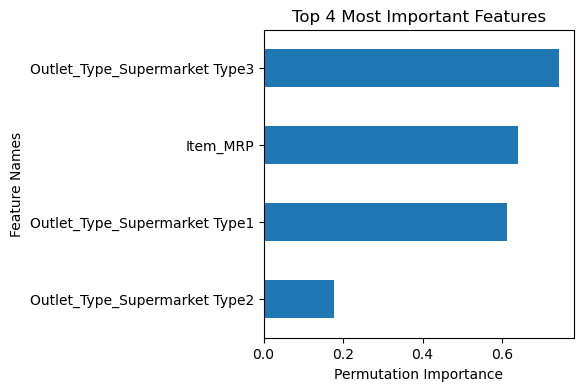

In [18]:
ax = plot_importance(permutation_importances,top_n=4)
ax.set(xlabel='Permutation Importance');

In [19]:
from matplotlib import pyplot as plt

# plt.savefig('sales.png', bbox_inches='tight')

plt.savefig('images/permutation_importance.png')

<Figure size 640x480 with 0 Axes>

## Select the top 3 most impactful features and interpret their coefficients in plain English.

The most impactful features are the outlet type - Type 1, 2, or 3 and the sale price of the object.  When predicting the sale of an item, the size and by implication the volume of products sold, have a large impact on the total sales of the product.  

The coefficients for each item: 

1) Outlet_Type_Supermarket Type3     3,365.88
2) Outlet_Type_Supermarket Type1     1,940.48
3) Outlet_Type_Supermarket Type2     1,657.92
4) Item_MRP                            984.31

means that depending on the store where the product is sold, these are the baseline sales figures for the product.

The Item_MRP coefficient means that for every increase in the unit price of the item, the total sales volume increases by 984.  

## Random Forest Regressor

In [20]:
from sklearn.ensemble import RandomForestRegressor


In [21]:
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df, y_test)

Training Data:	R^2= 0.94	RMSE= 436.18
Test Data:	R^2= 0.54	RMSE= 1128.84


In [22]:
reg.feature_importances_

array([0.00918371, 0.00259263, 0.00269466, 0.00452014, 0.00619959,
       0.00582558, 0.0082727 , 0.00306266, 0.00401807, 0.0067609 ,
       0.00361455, 0.00164241, 0.00176838, 0.00869452, 0.00570365,
       0.00352365, 0.0066722 , 0.00792908, 0.01047357, 0.00665385,
       0.0939629 , 0.06802184, 0.11186421, 0.05571324, 0.10900605,
       0.45162529])

In [23]:
## Checking the number of feature importances matches the # of columns
print(len(reg.feature_importances_))
print(len(X_train_df.columns))
len(reg.feature_importances_) == len(X_train_df.columns)

26
26


True

In [24]:
## Saving the feature importances
importances = pd.Series(reg.feature_importances_, index= feature_names,
                       name='Feature Importance')
importances

Item_Fat_Content_Regular           0.009184
Item_Type_Breads                   0.002593
Item_Type_Breakfast                0.002695
Item_Type_Canned                   0.004520
Item_Type_Dairy                    0.006200
Item_Type_Frozen Foods             0.005826
Item_Type_Fruits and Vegetables    0.008273
Item_Type_Hard Drinks              0.003063
Item_Type_Health and Hygiene       0.004018
Item_Type_Household                0.006761
Item_Type_Meat                     0.003615
Item_Type_Others                   0.001642
Item_Type_Seafood                  0.001768
Item_Type_Snack Foods              0.008695
Item_Type_Soft Drinks              0.005704
Item_Type_Starchy Foods            0.003524
Outlet_Size_Medium                 0.006672
Outlet_Size_Small                  0.007929
Outlet_Location_Type_Tier 2        0.010474
Outlet_Location_Type_Tier 3        0.006654
Outlet_Type_Supermarket Type1      0.093963
Outlet_Type_Supermarket Type2      0.068022
Outlet_Type_Supermarket Type3   

In [25]:
## Saving the feature importances sorted from smallest to largest (ascending=True)
sorted_importance = importances.sort_values()
sorted_importance

Item_Type_Others                   0.001642
Item_Type_Seafood                  0.001768
Item_Type_Breads                   0.002593
Item_Type_Breakfast                0.002695
Item_Type_Hard Drinks              0.003063
Item_Type_Starchy Foods            0.003524
Item_Type_Meat                     0.003615
Item_Type_Health and Hygiene       0.004018
Item_Type_Canned                   0.004520
Item_Type_Soft Drinks              0.005704
Item_Type_Frozen Foods             0.005826
Item_Type_Dairy                    0.006200
Outlet_Location_Type_Tier 3        0.006654
Outlet_Size_Medium                 0.006672
Item_Type_Household                0.006761
Outlet_Size_Small                  0.007929
Item_Type_Fruits and Vegetables    0.008273
Item_Type_Snack Foods              0.008695
Item_Fat_Content_Regular           0.009184
Outlet_Location_Type_Tier 2        0.010474
Item_Weight                        0.055713
Outlet_Type_Supermarket Type2      0.068022
Outlet_Type_Supermarket Type1   

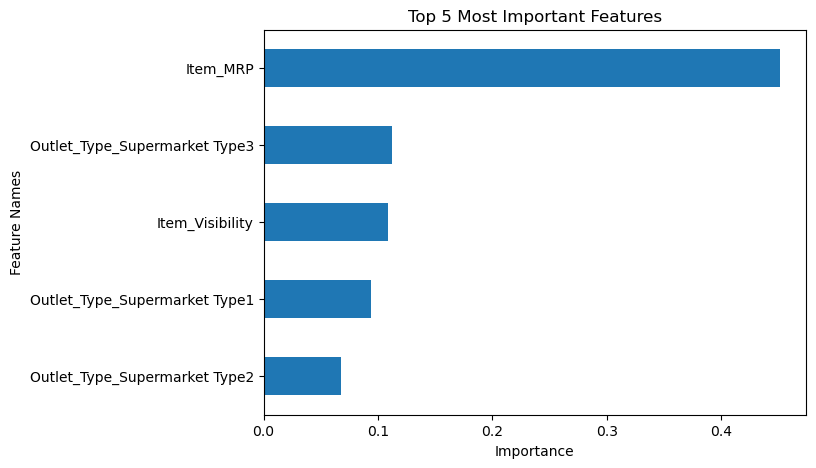

In [26]:
## plotting top 5 importances
ax = sorted_importance.tail(5).plot(kind='barh',
                                    figsize=(7,5),
                                      )
ax.set(xlabel='Importance',
        ylabel='Feature Names',
        title='Top 5 Most Important Features');

In [27]:
from sklearn.inspection import permutation_importance
## Permutation importance takes a fit X_test_df, y_test,n_repeats =5)
r.keys()

dict_keys(['importances_mean', 'importances_std', 'importances'])

In [28]:
## can make the mean importances into a series
permutation_importances = pd.Series(r['importances_mean'],index=X_test_df.columns,
                           name = 'permutation importance')
permutation_importances = permutation_importances.sort_values(ascending=False)
permutation_importances

Outlet_Type_Supermarket Type3      0.742848
Item_MRP                           0.640851
Outlet_Type_Supermarket Type1      0.612425
Outlet_Type_Supermarket Type2      0.177491
Outlet_Size_Medium                 0.000259
Item_Fat_Content_Regular           0.000189
Outlet_Location_Type_Tier 3        0.000102
Outlet_Location_Type_Tier 2        0.000095
Item_Visibility                    0.000019
Item_Type_Frozen Foods             0.000008
Item_Type_Hard Drinks             -0.000003
Item_Type_Household               -0.000020
Item_Type_Breads                  -0.000022
Item_Type_Canned                  -0.000025
Item_Type_Soft Drinks             -0.000030
Item_Type_Meat                    -0.000033
Item_Type_Others                  -0.000070
Item_Type_Breakfast               -0.000086
Item_Type_Starchy Foods           -0.000086
Outlet_Size_Small                 -0.000089
Item_Weight                       -0.000103
Item_Type_Health and Hygiene      -0.000110
Item_Type_Seafood               

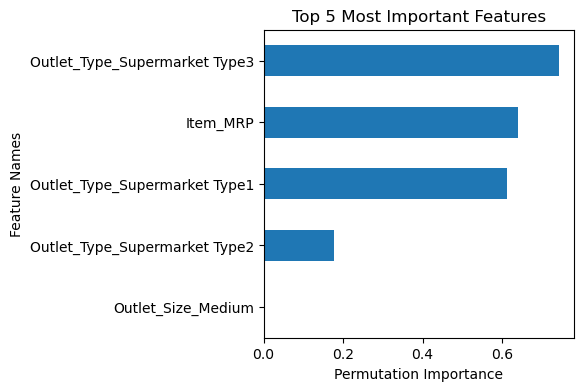

In [29]:
ax = plot_importance(permutation_importances,top_n=5)
ax.set(xlabel='Permutation Importance');

In [30]:
## color -coding top 5 bars
highlight_feats = importances.sort_values(ascending=True).tail(5).index
highlight_feats

Index(['Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type1',
       'Item_Visibility', 'Outlet_Type_Supermarket Type3', 'Item_MRP'],
      dtype='object')

In [31]:
## create a dictionary of each feature and its color
colors_dict = {}
for col in importances.index:
    if col in highlight_feats:
        colors_dict[col] = 'green'    
    else:
        colors_dict[col] = '#006ba4'
colors_dict

{'Item_Fat_Content_Regular': '#006ba4',
 'Item_Type_Breads': '#006ba4',
 'Item_Type_Breakfast': '#006ba4',
 'Item_Type_Canned': '#006ba4',
 'Item_Type_Dairy': '#006ba4',
 'Item_Type_Frozen Foods': '#006ba4',
 'Item_Type_Fruits and Vegetables': '#006ba4',
 'Item_Type_Hard Drinks': '#006ba4',
 'Item_Type_Health and Hygiene': '#006ba4',
 'Item_Type_Household': '#006ba4',
 'Item_Type_Meat': '#006ba4',
 'Item_Type_Others': '#006ba4',
 'Item_Type_Seafood': '#006ba4',
 'Item_Type_Snack Foods': '#006ba4',
 'Item_Type_Soft Drinks': '#006ba4',
 'Item_Type_Starchy Foods': '#006ba4',
 'Outlet_Size_Medium': '#006ba4',
 'Outlet_Size_Small': '#006ba4',
 'Outlet_Location_Type_Tier 2': '#006ba4',
 'Outlet_Location_Type_Tier 3': '#006ba4',
 'Outlet_Type_Supermarket Type1': 'green',
 'Outlet_Type_Supermarket Type2': 'green',
 'Outlet_Type_Supermarket Type3': 'green',
 'Item_Weight': '#006ba4',
 'Item_Visibility': 'green',
 'Item_MRP': 'green'}

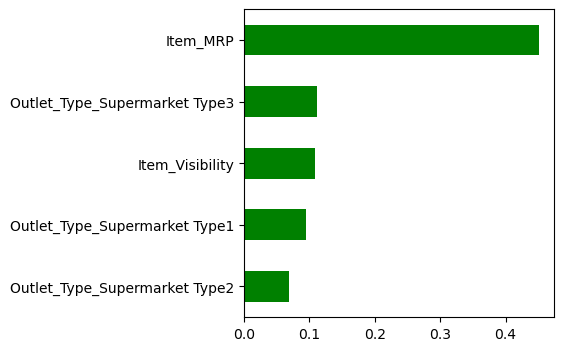

In [32]:
plot_vals = importances.sort_values().tail(5)
plot_vals.plot(kind='barh',color=plot_vals.index.map(colors_dict), figsize=(4,4));

In [33]:
# We can also define a custom function to create our dictionary more efficiently for future use:

def get_color_dict(importances, color_rest='#006ba4' , color_top='green',
                    top_n=7):
    ## color -coding top 5 bars
    highlight_feats = importances.sort_values(ascending=True).tail(top_n).index
    colors_dict = {col: color_top if col in highlight_feats else color_rest for col in importances.index}
    return colors_dict

In [34]:
colors_top7 = get_color_dict(importances, top_n=5)
colors_top7

{'Item_Fat_Content_Regular': '#006ba4',
 'Item_Type_Breads': '#006ba4',
 'Item_Type_Breakfast': '#006ba4',
 'Item_Type_Canned': '#006ba4',
 'Item_Type_Dairy': '#006ba4',
 'Item_Type_Frozen Foods': '#006ba4',
 'Item_Type_Fruits and Vegetables': '#006ba4',
 'Item_Type_Hard Drinks': '#006ba4',
 'Item_Type_Health and Hygiene': '#006ba4',
 'Item_Type_Household': '#006ba4',
 'Item_Type_Meat': '#006ba4',
 'Item_Type_Others': '#006ba4',
 'Item_Type_Seafood': '#006ba4',
 'Item_Type_Snack Foods': '#006ba4',
 'Item_Type_Soft Drinks': '#006ba4',
 'Item_Type_Starchy Foods': '#006ba4',
 'Outlet_Size_Medium': '#006ba4',
 'Outlet_Size_Small': '#006ba4',
 'Outlet_Location_Type_Tier 2': '#006ba4',
 'Outlet_Location_Type_Tier 3': '#006ba4',
 'Outlet_Type_Supermarket Type1': 'green',
 'Outlet_Type_Supermarket Type2': 'green',
 'Outlet_Type_Supermarket Type3': 'green',
 'Item_Weight': '#006ba4',
 'Item_Visibility': 'green',
 'Item_MRP': 'green'}

In [35]:
def plot_importance_color(importances, top_n=5,  figsize=(4,4), 
                          color_dict=None):
    
    # sorting with asc=false for correct order of bars
    if top_n==None:
        ## sort all features and set title
        plot_vals = importances.sort_values()
        title = "All Features - Ranked by Importance"
    else:
        ## sort features and keep top_n and set title
        plot_vals = importances.sort_values().tail(top_n)
        title = f"Top {top_n} Most Important Features"
    ## create plot with colors, if provided
    if color_dict is not None:
        ## Getting color list and saving to plot_kws
        colors = plot_vals.index.map(color_dict)
        ax = plot_vals.plot(kind='barh', figsize=figsize, color=colors)
        
    else:
        ## create plot without colors, if not provided
        ax = plot_vals.plot(kind='barh', figsize=figsize)
        
    # set titles and axis labels
    ax.set(xlabel='Importance', 
           ylabel='Feature Names', 
           title=title)
    
    ## return ax in case want to continue to update/modify figure
    return ax

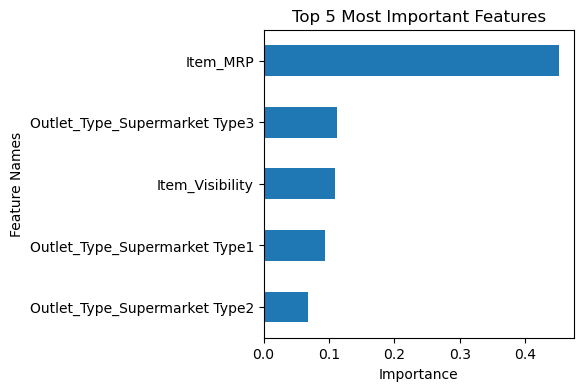

In [36]:
# First, let's test our function with no color dictionary.

plot_importance_color(importances, color_dict=None,top_n=5);

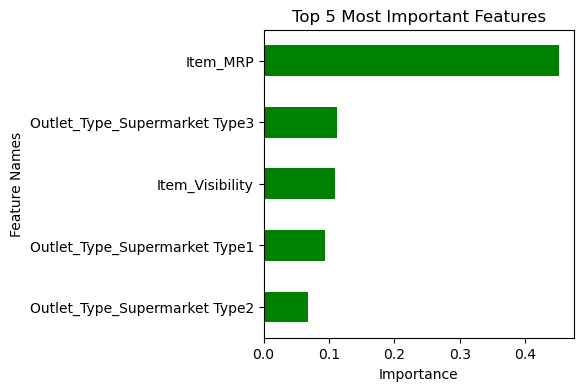

In [37]:
# Now, let's test our function with the color dictionary we created earlier.

plot_importance_color(importances, color_dict=colors_top7,top_n=5);

Based on both 'importance' and 'permutation importance' the top five features are item_MRP, outlet size (1, 2, and 3), and Item_Visibility.  

## Saving Model with Joblib

In [38]:
## saving variables for next lesson/notebook
import joblib


In [39]:
## creating a dictionary of all of the linear regression variables to save for later
export = {'X_train':X_train_df,
         'y_train': y_train,
         'X_test':X_test_df,
          "y_test": y_test,
         'preprocessor':preprocessor,
         'LinearRegression':lin_reg}
joblib.dump(export, 'linear_regression.joblib')

['linear_regression.joblib']

In [40]:
## creating a dictionary of all of the variables to save for later
export = {'X_train':X_train_df,
         'y_train': y_train,
         'X_test':X_test_df,
          "y_test": y_test,
         'preprocessor':preprocessor,
         'RandomForest':reg}
joblib.dump(export, 'random_forest.joblib')

['random_forest.joblib']